In [3]:
import tensorflow as tf 
import keras
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [8]:
train_images.shape 

(60000, 28, 28)

In [9]:
test_images.shape 

(10000, 28, 28)

In [10]:
len(train_labels) #В учебном наборе 60 000 меток  

60000

In [11]:
len(test_labels) #В тестовом наборе 10 000 меток 

10000

In [12]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

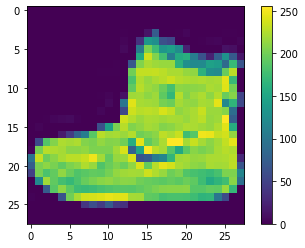

In [13]:
plt.figure() 
plt.imshow(train_images[0]) 
plt.colorbar() 
plt.grid(False)

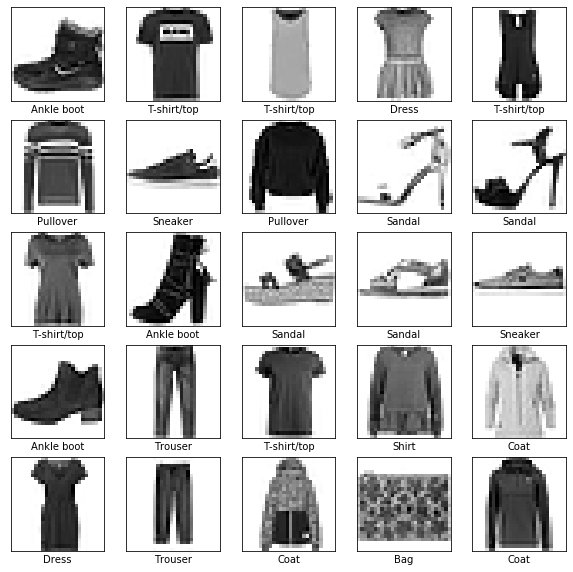

In [36]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [14]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [15]:
model = keras.Sequential([
keras.layers.Flatten(input_shape=(28, 28)), 
keras.layers.Dense(128, activation=tf.nn.relu), 
keras.layers.Dense(10, activation=tf.nn.softmax) 
])

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
model.compile(optimizer=tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', 
metrics=['accuracy'])


In [17]:
model.fit(train_images, train_labels, epochs=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
60000/60000 [==============================] - 8s 131us/step - loss: 0.5059 - acc: 0.8224


In [19]:
test_loss, test_acc = model.evaluate(test_images, test_labels) 
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 52us/step
Test accuracy: 0.8415


In [20]:
predictions = model.predict(test_images) 

In [21]:
predictions[0]

array([6.3184139e-05, 5.9486597e-06, 4.3078559e-05, 2.5144400e-05,
       1.9883348e-05, 3.2724064e-02, 1.1658096e-04, 1.1494802e-01,
       1.2514668e-03, 8.5080266e-01], dtype=float32)

In [23]:
np.argmax(predictions[0])

9

In [24]:
test_labels[0]

9

In [37]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

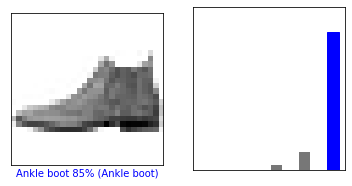

In [38]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

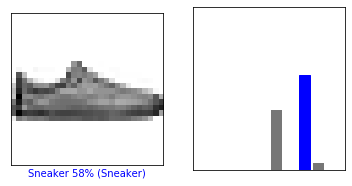

In [39]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

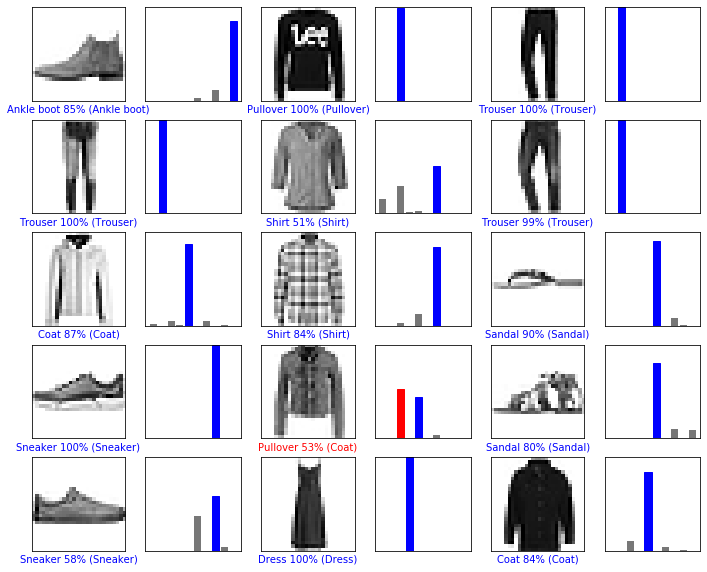

In [40]:
# Отображаем первые X тестовых изображений, их предсказанную и настоящую метки
# Корректные предсказания окрашиваем в синий цвет, ошибочные в красный
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()